In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mnist import MNIST
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

## Loading the Data

In [2]:
with np.load("mnist.npz") as data:
    x_train = data["training_images"]
    y_train = data["training_labels"]
    x_test = data["test_images"]
    y_test = data["test_labels"]
    v_x = data["validation_images"]
    v_y = data["validation_labels"]

### Merging Training and Validation Datasets

In [3]:
x_train = np.append(x_train,v_x,axis=0)
y_train = np.append(y_train,v_y,axis=0)

In [4]:
x_train.shape,y_train.shape

((60000, 784, 1), (60000, 10, 1))

### Flattening the Images

In [5]:
x_train = np.reshape(x_train,(60000,28*28))
x_test = np.reshape(x_test, (10000,28*28))

### Merging Dummies for Labels

In [6]:
y_t = []
for i in range(len(y_train)):
    y_t.append([i[0] for i in y_train[i]].index(1))
y_train = np.array(y_t)

In [7]:
y_tt = []
for i in range(len(y_test)):
    y_tt.append([i[0] for i in y_test[i]].index(1))
y_test = np.array(y_tt)

## Centroid Calculation

In [8]:
centroid = []
for i in set(y_train):
    fr = []
    for j in range(x_train.shape[1]):
        fr.append(x_train[y_train==i][:,j].mean())
    centroid.append(fr)
centroid = np.array(centroid)

Label 0


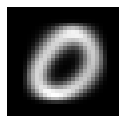

Label 1


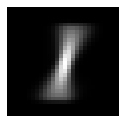

Label 2


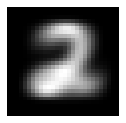

Label 3


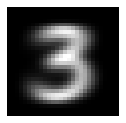

Label 4


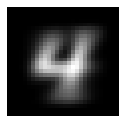

Label 5


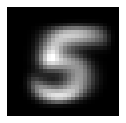

Label 6


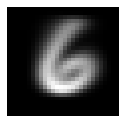

Label 7


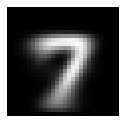

Label 8


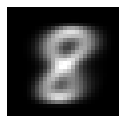

Label 9


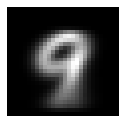

In [9]:
for i,j in enumerate(centroid):
    print(f"Label {i}")
    image_plot = np.reshape(j, (28,28))
    plt.figure(figsize=(2,2))
    plt.axis("off")
    plt.imshow(image_plot, cmap="gray", aspect="auto")
    plt.show()

## Prediction

In [10]:
coddist = lambda a,b: np.sqrt(np.sum((a-b)**2)).round(3)

In [11]:
y_preds = []
for i in x_test:
    s = [coddist(i,j) for j in centroid]
    y_preds.append(s.index(min(s)))
y_preds = np.array(y_preds)

## Accuracy Metrics

### Total Accuracy

In [12]:
tot = ((sum(y_preds==y_test)/len(y_preds))*100).round(2)
print(f"Total Accuracy : {tot}%")

Total Accuracy : 82.05%


### Class Wise Accuracy

In [13]:
lab_acc = []
for i in set(y_train):
    s = ((sum((y_test[y_preds==i]-y_preds[y_preds==i])==0)/len(y_preds[y_preds==i]))*100).round(2)
    lab_acc.append(s)
    print(f"Accuracy for Label {i}: {s}%")

Accuracy for Label 0: 91.27%
Accuracy for Label 1: 76.96%
Accuracy for Label 2: 87.85%
Accuracy for Label 3: 76.53%
Accuracy for Label 4: 80.16%
Accuracy for Label 5: 75.18%
Accuracy for Label 6: 87.7%
Accuracy for Label 7: 91.26%
Accuracy for Label 8: 79.16%
Accuracy for Label 9: 77.52%


## Cheery on the Top!!

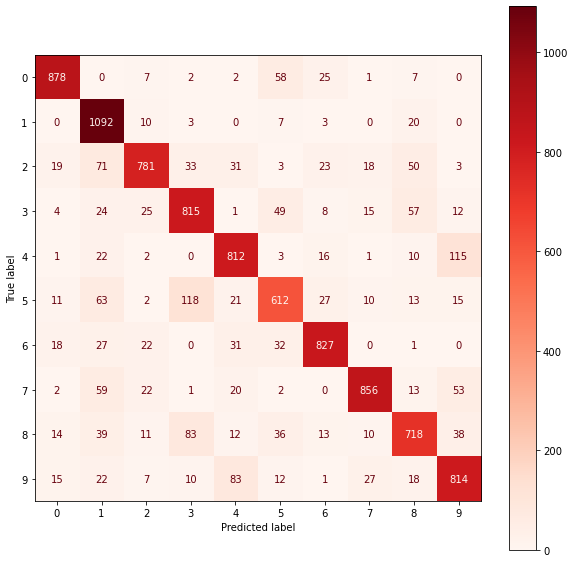

In [14]:
conf = ConfusionMatrixDisplay.from_predictions(y_test,y_preds,cmap="Reds")
fig = conf.ax_.get_figure() 
fig.set_figwidth(10)
fig.set_figheight(10)  

In [15]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       980
           1       0.77      0.96      0.86      1135
           2       0.88      0.76      0.81      1032
           3       0.77      0.81      0.79      1010
           4       0.80      0.83      0.81       982
           5       0.75      0.69      0.72       892
           6       0.88      0.86      0.87       958
           7       0.91      0.83      0.87      1028
           8       0.79      0.74      0.76       974
           9       0.78      0.81      0.79      1009

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



## Exporting the Exploits

In [16]:
df = pd.DataFrame()
df["Metric"] = [f"Label {i}" for i in set(y_train)]
df["Accuracy"] = [i/100 for i in lab_acc]
df.loc[10] = ["Total",tot/100]

In [17]:
df

,Metric,Accuracy
0,Label 0,0.9127
1,Label 1,0.7696
2,Label 2,0.8785
3,Label 3,0.7653
4,Label 4,0.8016
5,Label 5,0.7518
6,Label 6,0.8770
7,Label 7,0.9126
8,Label 8,0.7916
9,Label 9,0.7752


In [18]:
# df.to_csv("MNIST by Nakli KNN.csv",index=False,header=True)